<h1 style="text-align: center;">AAE 590 Surrogate Methods</h1>

## Local Constrained Optimization

This notebook supports material covered in the class for local *constrained* optimization. We will be using `scipy.optimize` module for minimizing examples mentioned below:

1. [Analytical Function](#Example-1)
2. [Beam problem](#Example-2)

Going through the following documentation will help in understanding the code:

1. [Scipy minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
2. [Matplotlib contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)
3. [Scipy nonlinear constraint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html#scipy.optimize.NonlinearConstraint)

<font color='red'>**Please run the below block of code before you run any other block**</font> - it imports all the packages needed for this notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
from math import ceil, floor

### Example 1

Consider the function described below.

$$
    f(x_1,x_2) = x_1^2 - \frac{x_1}{2} - x_2 - 2 \\
    g_1(x_1,x_2) = x_1^2 -4x_1 + x_2 + 1  \leq 0 \\
    g_2(x_1,x_2) = \frac{x_1^2}{2} + x_2^2 - x_1 - 4 \leq 0
$$

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns value of example 1 function at any given $x$.

In [98]:
def example_1(x1, x2):
    """
        Function which calculates the function and constraint value in example 1 at given x.
        
        Input:
        x1 - first variable in the function. Can be an int, float, or numpy array.
        x2 - second variable in the function. Can be an int, float, or numpy array.
        
        Note: size and type of both the inputs should be same.
    """
    
    f = x1**2 - x1/2 - x2 - 2
    g1 = x1**2 - 4*x1 + x2 + 1
    g2 = x1**2 / 2 + x2**2 - x1 - 4
    
    return f, g1, g2

Below block of code makes a contour plot of the example function.

Text(0, 0.5, '$x_2$')

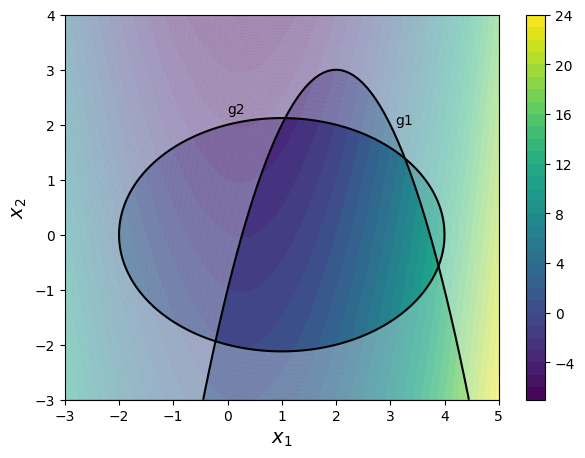

In [99]:
# Defining x and y values
x = np.linspace(-3,5,100)
y = np.linspace(-3,4,100)

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the function values at meshpoints
Z, g1, g2 = example_1(X,Y)

# Plotting the filled contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=30)
fig.colorbar(CS, orientation='vertical')

# Plotting g1
ax.contour(X, Y, g1, levels=[0], colors="k")
ax.contourf(X, Y, g1, levels=np.linspace(0,g1.max()), colors="white", alpha=0.3, antialiased = True)
ax.annotate('g1', xy =(3.1, 2.0))

# Plotting g2
ax.contour(X, Y, g2, levels=[0], colors="k")
ax.contourf(X, Y, g2, levels=np.linspace(0,g2.max()), colors="white", alpha=0.3, antialiased = True)
ax.annotate('g2', xy =(0.0, 2.2))

ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)


All the white shaded region is **infeasible**.

**Question**: Use SLSQP method for minimizing this function.

**Answer**: Below block of code defines various functions which are used during the optimization. Only the last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [102]:
def example1_obj(x) -> float:
    """
        Function given to optimizer. Example 1 function
        is not used directly since scipy.minimize needs objective
        function in different format.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    f, _, _ = example_1(x[0], x[1])
    
    return f

def example1_g1(x) -> float:
    """
        Function is used to create nonlinear constraint object
        for g1 which is given to optimizer.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    _, g1, _ = example_1(x[0], x[1])
    
    return g1

def example1_g2(x) -> float:
    """
        Function is used to create nonlinear constraint object
        for g2 which is given to optimizer.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    _, _, g2 = example_1(x[0], x[1])
    
    return g2

def example1_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value.
        
        Input: Current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(example1_obj(x))
    history["g1"].append(example1_g1(x))
    history["g2"].append(example1_g2(x))
    
def example1_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dict which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A str which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1
    
    xlower = floor(min(min(history["x1"]), -3))
    xupper = ceil(max(max(history["x1"]), 5))
    
    ylower = floor(min(min(history["x2"]), -3))
    yupper = ceil(max(max(history["x2"]), 4))
    
    # Defining x and y values
    x = np.linspace(xlower, xupper, 100)
    y = np.linspace(ylower, yupper, 100)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z, g1, g2 = example_1(X,Y)

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.plot(np.arange(num_itr+1), history["g1"], "k--", marker=".", label="$g_1$")
    ax.plot(np.arange(num_itr+1), history["g2"], "g--", marker=".", label="$g_2$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)

    # Plotting function contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=30)
    fig.colorbar(CS, orientation='vertical')
    
    # Plotting g1
    ax.contour(X, Y, g1, levels=[0], colors="k", linestyles="dashed")
    ax.contourf(X, Y, g1, levels=np.linspace(0,g1.max()), colors="white", alpha=0.3, antialiased = True)
    ax.annotate('g1', xy =(3.1, 2.0))

    # Plotting g2
    ax.contour(X, Y, g2, levels=[0], colors="k", linestyles="dashed")
    ax.contourf(X, Y, g2, levels=np.linspace(0,g2.max()), colors="white", alpha=0.3, antialiased = True)
    ax.annotate('g2', xy =(0.0, 2.2))

    # PLotting other things
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.scatter(history["x1"][0], history["x2"][0], label="Starting point", c="red")
    ax.scatter(history["x1"][-1], history["x2"][-1], label="Final point", c="orange")
    
    # Adding labels and legend
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.legend()

    plt.show()

Below block of code defines various parameters and performs optimization using **SLSQP** method.

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.523406546437449
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
Value of x1 at optimum: 1.0623763071639867
Value of x2 at optimum: 2.120861810878845
Value of g1 at optimum: 2.462878789799561e-10
Value of g2 at optimum: 2.226920017278644e-07


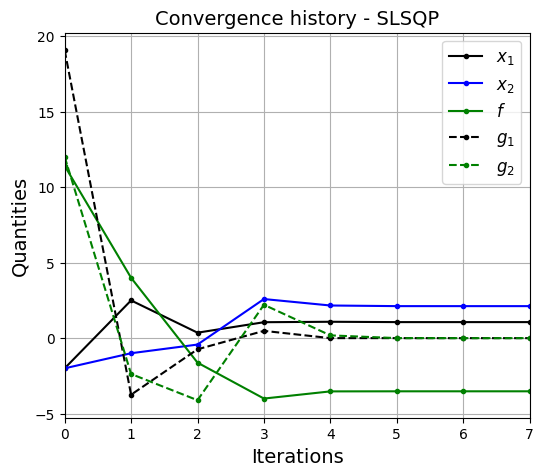

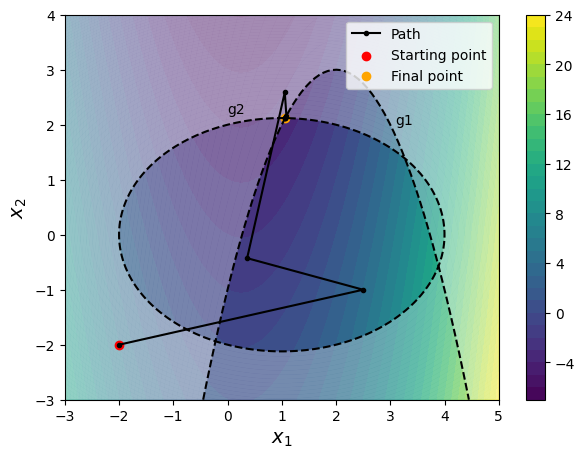

In [108]:
# Starting point
x0 = np.array([-2.0, -2.0])

# Solver
method = "SLSQP"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"]= [example1_obj(x)]
history["g1"] = [example1_g1(x)]
history["g2"] = [example1_g2(x)]

# Solver options
options ={
    "disp": True
}

# Setting constraints - optimizer needs a list of Nonlinear constraints objects
# Read the documentation for more details.
constraints = [NonlinearConstraint(example1_g1, -np.inf, 0),
               NonlinearConstraint(example1_g2, -np.inf, 0)]

# Minimize the function
result = minimize(fun=example1_obj, x0=x0, method=method, jac=jac, 
                  constraints=constraints, callback=example1_callback, 
                  options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))
print("Value of g1 at optimum: {}".format(example1_g1(result.x)))
print("Value of g2 at optimum: {}".format(example1_g2(result.x)))

# Convergence plots
example1_opt_plots(history, method=method)

Optimum point lies at the intersection of both the constraints (which makes both the constraints active). You can change the starting point and see what happends.

Now, we will use **quadratic penalty function** to transform the constrained problem into unconstrained problem and use *BFGS* to optimize it. Below block of code defines a function which returns penalized objective function and is given to optimizer.

In [ ]:
def penalized_obj(x):
    """
        Function for performing penalized objective.
    """
    
    # Compute objective and constraints
    obj, g1, g2 = example_1(x[0], x[1])
    
    # Penalty multipliers
    p1 = 100
    p2 = 100
    
    # Returns quadratic penalized function
    return obj + p1 * max(g1,0)**2 / 2 + p2 * max(g2,0)**2 / 2

Below block of code defines various parameters for optimization using BFGS method.

Optimization terminated successfully.
         Current function value: -3.527135
         Iterations: 25
         Function evaluations: 201
         Gradient evaluations: 67


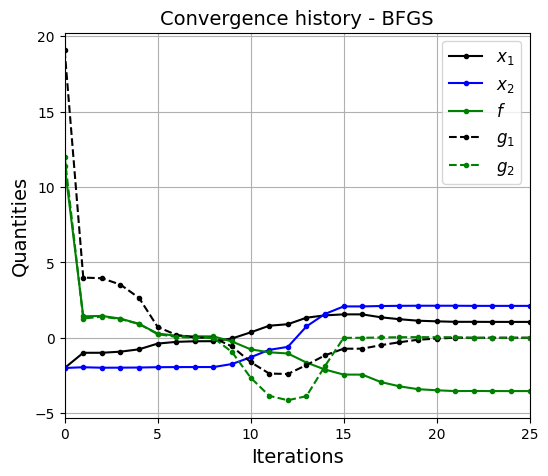

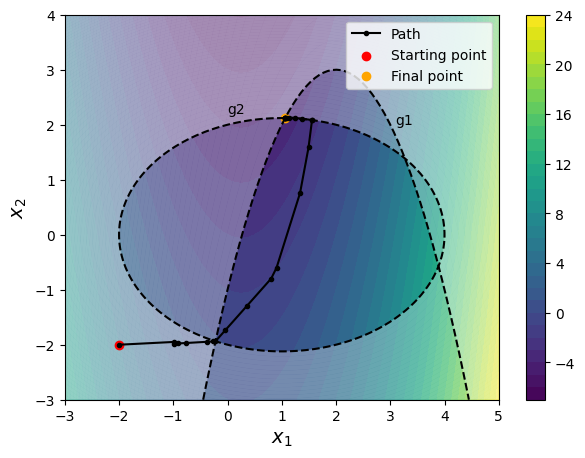

In [109]:
# Starting point
x0 = np.array([-2.0, -2.0])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"]= [example1_obj(x)]
history["g1"] = [example1_g1(x)]
history["g2"] = [example1_g2(x)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=penalized_obj, x0=x0, method=method, jac=jac, callback=example1_callback, options=options)

# Convergence plots
example1_opt_plots(history, method=method)

By using the penalty method, you can reach the optimum. But note the number of function evaluations which is a lot when compared to *SLSQP* method.

### Example 2

Consider a $1$ m long cantilevered beam (shown below) with a H-shaped cross section composed of a web and flanges subject to a
transverse load $P$ of 100 kN. The objective is to minimize the structural weight by varying the web thickness $t_w$ and the flange thickness $t_b$, subject to stress constraints. The other cross-sectional parameters are fixed; the web height $h$ is 250 mm, and the flange width $b$ is 125 mm. The axial stress in the flange and the shear stress in the web should not exceed the corresponding yield values ($\sigma_{yield} = 200$ MPa, and $\tau_{yield} = 116$ MPa, respectively).

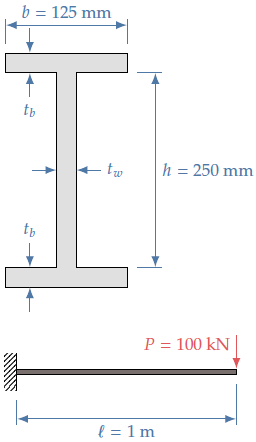

The problem in standard form is as follows:

$$
    \min_{t_w, t_b} 2bt_b + ht_w \\
    \text{subject to }
    \begin{aligned}
        \frac{Plh}{2I} - \sigma_{yield} \leq 0 \\
        \qquad \frac{1.5P}{ht_w} - \tau_{yield} \leq 0
    \end{aligned}
$$

where $I$ is second moment of area for the H section. given by following formula:

$$
    I = \frac{h^3}{12}t_w + \frac{b}{6}t_b^3 + \frac{h^2b}{2}t_b
$$

Since, $t_w$ and $t_b$ are physical quantities, it cannot be negative. So, we have following bounds:

$$
    t_w \geq 0 \text{ and } t_b \geq 0
$$

Note that bounds on the design variables are not considered as constraints since handling them separately is much more efficient.

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns cross sectional area and both the constraints at any given $x$.

In [110]:
def moment_of_inertia(tw, tb):
    """
        Function to calculate the moment of inertia of H beam with given 
        web and flange thickness.
        
        Input:
        tw - Web thickness in meter.
        tb - flange thickness in meter.
    """
    
    h = 0.250 # in m
    b = 0.125 # in m
    
    I = h**3 * tw / 12 + b * tb**3 / 6 + h**2 * b * tb / 2 # in m^4
    
    return I
    
def example_2(tw, tb):
    """
        Function to calculate the value of cross-sectional area of beam,
        g1, and g2 at gvien values of tw and tb.
        
        Input:
        tw - Web thickness in meter.
        tb - flange thickness in meter.
    """
    
    h = 0.25 # in m
    b = 0.125 # in m
    
    P = 1e5 # in N
    l = 1 # in m
    axial_stress_yield = 200e6 # in Pa
    shear_stress_yield = 116e6 # in Pa
    
    obj = 2*b*tb + h*tw # Computing the objective
    
    I = moment_of_inertia(tw, tb) # Computing moment of inertia
    
    g1 = P*l*h/2/I - axial_stress_yield # Computing axial stress constraint
    
    g2 = 1.5*P/h/tw - shear_stress_yield # Computing shear stress constraint
    
    return obj, g1, g2

Below block of code makes a contour plot of the design space.

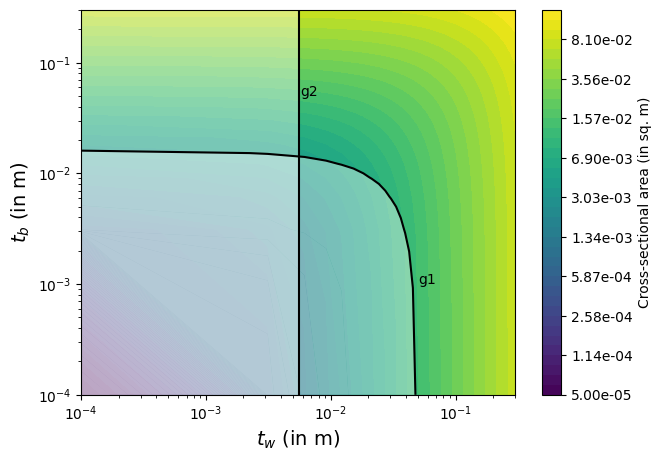

In [111]:
# Defining x and y values
tw = np.linspace(1e-4, 3e-1, 100) # in m
tb = np.linspace(1e-4, 3e-1, 100) # in m

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X, Y = np.meshgrid(tw, tb)

# Evaluating the function values at meshpoints
Z, g1, g2 = example_2(X,Y)

# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 40
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since levels for contour
# is defined on log scale
norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

# Plotting the filled contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
cbar = fig.colorbar(CS, format='%.2e', orientation='vertical')
cbar.set_label("Cross-sectional area (in sq. m)")

# Plotting g1
ax.contour(X, Y, g1, levels=[0], colors="k")
ax.contourf(X, Y, g1, levels=np.linspace(0,g1.max()), colors="white", alpha=0.4, antialiased = True)
ax.annotate('g1', xy =(5e-2, 1e-3))

# Plotting g2
ax.contour(X, Y, g2, levels=[0], colors="k")
ax.contourf(X, Y, g2, levels=np.linspace(0,g2.max()), colors="white", alpha=0.4, antialiased = True)
ax.annotate('g2', xy =(5.7e-3, 5e-2))

# Adding labels and legend
ax.set_xlabel("$t_w$ (in m)", fontsize=14)
ax.set_ylabel("$t_b$ (in m)", fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')

All the white shaded region is **infeasible**.

**Question**: Use SLSQP method for this optimization problem.

**Answer**: Below block of code defines functions which are used during the optimization. Read comments in the function for more details.

In [112]:
def example2_obj(x):
    """
        Function given to optimizer. main function
        is not used directly since scipy.minimize needs objective
        function in different format.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    obj, _, _ = example_2(x[0], x[1])
    
    return obj
    
def example2_g1(x):
    """
        Function is used to create Nonlinear constraint object
        for g1 which is given to optimizer.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    _, g1, _ = example_2(x[0], x[1])
    
    return g1

def example2_g2(x):
    """
        Function is used to create Nonlinear constraint object
        for g2 which is given to optimizer.
        
        Input: 1D numpy array only.
        Output: scalar value only.
    """
    
    _, _, g2 = example_2(x[0], x[1])
    
    return g2

def example2_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, function and constraint value.
        
        Input: Current x value
        Output: None
    """
    
    history["tw"].append(x[0])
    history["tb"].append(x[1])
    history["f"].append(example2_obj(x))
    history["g1"].append(example2_g1(x))
    history["g2"].append(example2_g2(x))
    
def example2_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dict which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A str which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["tw"]) - 1
    
    xlower = min(min(history["tw"]), 1e-4)
    xupper = max(max(history["tw"]), 3e-1)
    
    ylower = min(min(history["tb"]), 1e-4)
    yupper = max(max(history["tb"]), 3e-1)
    
    # Defining x and y values
    x = np.linspace(xlower, xupper, 100)
    y = np.linspace(ylower, yupper, 100)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z, g1, g2 = example_2(X,Y)

    # Plotting the convergence history
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plotting f, tw and tb convergence history
    ax[0].plot(np.arange(num_itr+1), history["tw"], "k", marker=".", label="$x_1$")
    ax[0].plot(np.arange(num_itr+1), history["tb"], "b", marker=".", label="$x_2$")
    ax[0].plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax[0].set_xlabel("Iterations", fontsize=14)
    ax[0].set_xlim(left=0, right=num_itr)
    ax[0].set_ylabel("$f$, $t_w$, $t_b$", fontsize=14)
    ax[0].grid()
    ax[0].legend(fontsize=12)
    
    # Plotting g1 and g2 convergence history
    ax[1].plot(np.arange(num_itr+1), history["g1"], "k", marker=".", label="$g_1$")
    ax[1].plot(np.arange(num_itr+1), history["g2"], "g", marker=".", label="$g_2$")
    ax[1].set_xlabel("Iterations", fontsize=14)
    ax[1].set_xlim(left=0, right=num_itr)
    ax[1].set_ylabel("$g_1$, $g_2$", fontsize=14)
    ax[1].grid()
    ax[1].legend(fontsize=12)
    
    fig.suptitle("Convergence history - " + method, fontsize=14)
    
    # Contour levels are evaluated in logscale since the difference
    # between minimum and maximum value of function is large.
    noOfLevels = 40
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

    # Defining normalization which is used to normalize the function values
    # before mapping with color. We need to use this since levels for contour
    # is defined on log scale
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())
    
    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    cbar = fig.colorbar(CS, format='%.2e', orientation='vertical')
    cbar.set_label("Cross-sectional area (in sq. m)")

    # Plotting g1
    ax.contour(X, Y, g1, levels=[0], colors="k")
    ax.contourf(X, Y, g1, levels=np.linspace(0,g1.max()), colors="white", alpha=0.4, antialiased = True)
    ax.annotate('g1', xy =(5e-2, 1e-3))

    # Plotting g2
    ax.contour(X, Y, g2, levels=[0], colors="k")
    ax.contourf(X, Y, g2, levels=np.linspace(0,g2.max()), colors="white", alpha=0.4, antialiased = True)
    ax.annotate('g2', xy =(5.7e-3, 5e-2))
    
    # PLotting other things
    ax.plot(history["tw"], history["tb"], "k", marker=".", label="Path")
    ax.scatter(history["tw"][0], history["tb"][0], label="Starting point", c="red")
    ax.scatter(history["tw"][-1], history["tb"][-1], label="Final point", c="orange")

    # Adding labels and legend
    ax.set_xlabel("$t_w$ (in m)", fontsize=14)
    ax.set_ylabel("$t_b$ (in m)", fontsize=14)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend()

    plt.show()

Below block of code defines various parameters and performs optimization using **SLSQP** method.

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.004858202328095406
            Iterations: 13
            Function evaluations: 71
            Gradient evaluations: 13
Value of tw (in m) at optimum: 0.005172413793103474
Value of tb (in m) at optimum: 0.01426039551927815
Value of g1 at optimum: -5.960464477539063e-08
Value of g2 at optimum: -5.811452865600586e-07


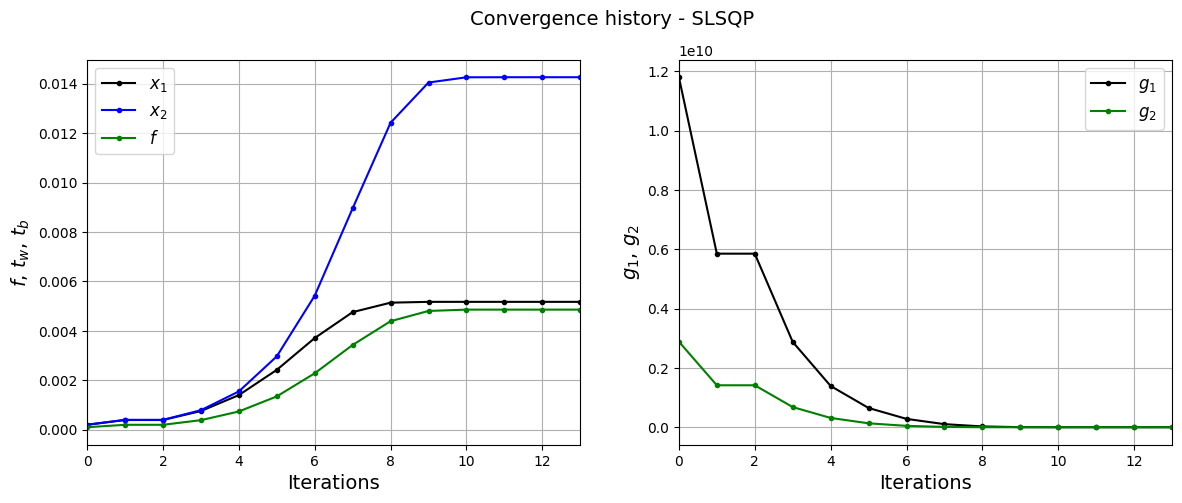

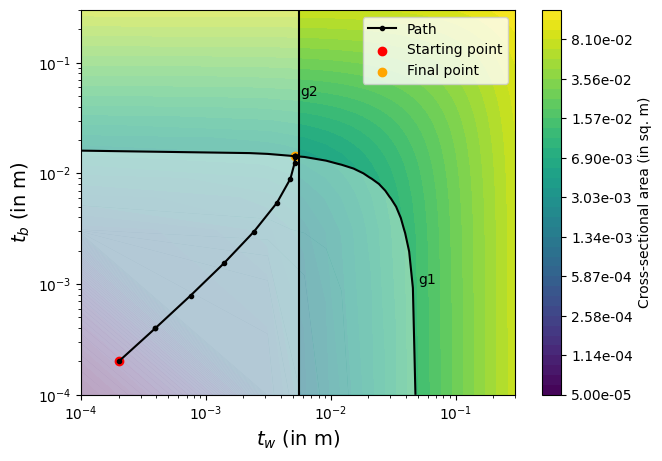

In [113]:
# Starting point
x0 = np.array([2e-4, 2e-4])

# Solver
method = "SLSQP"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["tw"] = [x0[0]]
history["tb"] = [x0[1]]
history["f"]= [example2_obj(x0)]
history["g1"] = [example2_g1(x0)]
history["g2"] = [example2_g2(x0)]

# Solver options
options ={
    "disp": True
}

# Setting constraints - optimizer needs a list of Nonlinear constraints objects
# Read the documentation for more details.
constraints = [NonlinearConstraint(example2_g1, -np.inf, 0),
               NonlinearConstraint(example2_g2, -np.inf, 0)]

# Bounds - list of tuples
bounds = [(0, np.inf), (0, np.inf)]

# Minimize the function
result = minimize(fun=example2_obj, x0=x0, method=method, jac=jac, bounds=bounds,
                  constraints=constraints, callback=example2_callback, 
                  options=options)

# Print value of x
print("Value of tw (in m) at optimum: {}".format(result.x[0]))
print("Value of tb (in m) at optimum: {}".format(result.x[1]))
print("Value of g1 at optimum: {}".format(example2_g1(result.x)))
print("Value of g2 at optimum: {}".format(example2_g2(result.x)))

# Convergence plots
example2_opt_plots(history, method=method)

You can see that optimum is at the intersection of both the constraints, making both of them active. You can verify if this solution is correct or not by analytically solving the KKT conditions. **Note**: Problem is quite senstitive to the starting point. You can change the starting point and see what happens. You can also change the way problem is formulated and see if it helps in alleviating the issue.